In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load .csv files
account_activity = pd.read_csv('account_activity.csv')
amount_data = pd.read_csv('amount_data.csv')
anomaly_scores = pd.read_csv('anomaly_scores.csv')
customer_data = pd.read_csv('customer_data.csv')
fraud_indicators = pd.read_csv('fraud_indicators.csv')
merchant_data = pd.read_csv('merchant_data.csv')
suspicious_activity = pd.read_csv('suspicious_activity.csv')
transaction_category_labels = pd.read_csv('transaction_category_labels.csv')
transaction_metadata = pd.read_csv('transaction_metadata.csv')
transaction_records = pd.read_csv('transaction_records.csv')

# Check if values are missing
print("ACCOUNT ACTIVITY")
print(account_activity.isnull().sum())
print("")
print("AMOUNT DATA")
print(amount_data.isnull().sum())
print("")
print("ANOMALY SCORES")
print(anomaly_scores.isnull().sum())
print("")
print("CUSTOMER DATA")
print(customer_data.isnull().sum())
print("")
print("FRAUD INDICATORS")
print(fraud_indicators.isnull().sum())
print("")
print("MERCHANT DATA")
print(merchant_data.isnull().sum())
print("")
print("SUSPICIOUS ACTIVITY")
print(suspicious_activity.isnull().sum())
print("")
print("TRANSACTION CATEGORY LABELS")
print(transaction_category_labels.isnull().sum())
print("")
print("TRANSACTION METADATA")
print(transaction_metadata.isnull().sum())
print("")
print("TRANSACTION RECORDS")
print(transaction_records.isnull().sum())

ACCOUNT ACTIVITY
CustomerID        0
AccountBalance    0
LastLogin         0
dtype: int64

AMOUNT DATA
TransactionID        0
TransactionAmount    0
dtype: int64

ANOMALY SCORES
TransactionID    0
AnomalyScore     0
dtype: int64

CUSTOMER DATA
CustomerID    0
Name          0
Age           0
Address       0
dtype: int64

FRAUD INDICATORS
TransactionID     0
FraudIndicator    0
dtype: int64

MERCHANT DATA
MerchantID      0
MerchantName    0
Location        0
dtype: int64

SUSPICIOUS ACTIVITY
CustomerID        0
SuspiciousFlag    0
dtype: int64

TRANSACTION CATEGORY LABELS
TransactionID    0
Category         0
dtype: int64

TRANSACTION METADATA
TransactionID    0
Timestamp        0
MerchantID       0
dtype: int64

TRANSACTION RECORDS
TransactionID    0
Amount           0
CustomerID       0
dtype: int64


In [12]:
# Statistical Aggregations
print("ACCOUNT ACTIVITY")
print(account_activity.describe())
print("")
print(account_activity.describe(include=['object']))
print("")
print("AMOUNT DATA")
print(amount_data.describe())
print("")
print("ANOMALY SCORES")
print(anomaly_scores.describe())
print("")
print("CUSTOMER DATA")
print(customer_data.describe())
print("")
print(customer_data.describe(include=['object']))
print("")
print("FRAUD INDICATORS")
print(fraud_indicators.describe())
print("")
print("MERCHANT DATA")
print(merchant_data.describe())
print("")
print(merchant_data.describe(include=['object']))
print("")
print("SUSPICIOUS ACTIVITY")
print(suspicious_activity.describe())
print("")
print("TRANSACTION CATEGORY LABELS")
print(transaction_category_labels.describe())
print("")
print(transaction_category_labels.describe(include=['object']))
print("")
print("TRANSACTION METADATA")
print(transaction_metadata.describe())
print("")
print(transaction_metadata.describe(include=['object']))
print("")
print("TRANSACTION RECORDS")
print(transaction_records.describe())
print("")

ACCOUNT ACTIVITY
        CustomerID  AccountBalance
count  1000.000000     1000.000000
mean   1500.500000     5558.067698
std     288.819436     2596.890997
min    1001.000000     1009.248716
25%    1250.750000     3297.255763
50%    1500.500000     5569.672709
75%    1750.250000     7910.029699
max    2000.000000     9999.776239

         LastLogin
count         1000
unique        1000
top     2024-09-26
freq             1

AMOUNT DATA
       TransactionID  TransactionAmount
count    1000.000000        1000.000000
mean      500.500000          55.853826
std       288.819436          26.093606
min         1.000000          10.057864
25%       250.750000          33.875129
50%       500.500000          55.958313
75%       750.250000          77.589391
max      1000.000000          99.784323

ANOMALY SCORES
       TransactionID  AnomalyScore
count    1000.000000   1000.000000
mean      500.500000      0.492282
std       288.819436      0.288423
min         1.000000      0.000234
25%     

In [49]:
import pandas as pd

# Load the datasets
account_activity = pd.read_csv('account_activity.csv')
amount_data = pd.read_csv('amount_data.csv')
anomaly_scores = pd.read_csv('anomaly_scores.csv')
fraud_indicators = pd.read_csv('fraud_indicators.csv')
suspicious_activity = pd.read_csv('suspicious_activity.csv')
transaction_category_labels = pd.read_csv('transaction_category_labels.csv')
transaction_metadata = pd.read_csv('transaction_metadata.csv')
transaction_records = pd.read_csv('transaction_records.csv')

# Merge relevant daatasets
merged_transactions = transaction_records.merge(amount_data, on='TransactionID', how='left')
merged_transactions = merged_transactions.merge(transaction_category_labels, on='TransactionID', how='left')
merged_transactions = merged_transactions.merge(transaction_metadata, on='TransactionID', how='left')
merged_transactions = merged_transactions.merge(fraud_indicators, on='TransactionID', how='left')
merged_transactions = merged_transactions.merge(anomaly_scores, on='TransactionID', how='left')
merged_transactions = merged_transactions.merge(account_activity, on='CustomerID', how='left')
merged_transactions = merged_transactions.merge(suspicious_activity, on='CustomerID', how='left')

# Save the merged dataset for further analysis
merged_transactions.to_csv('CreangaStefanAssignment2.csv', index=False)

print("Merged dataset saved as 'CreangaStefanAssignment2.csv'")


Merged dataset saved as 'CreangaStefanAssignment2.csv'


In [41]:
# Showcasing the dataset
print(merged_transactions.head())
print("")

# Shows column names
print(merged_transactions.columns)
print("")

# Check for any missing values
print(merged_transactions.isnull().sum())


   TransactionID     Amount  CustomerID  TransactionAmount Category  \
0              1  55.530334        1952          79.413607    Other   
1              2  12.881180        1027          12.053087   Online   
2              3  50.176322        1955          33.310357   Travel   
3              4  41.634001        1796          46.121117   Travel   
4              5  78.122853        1946          54.051618    Other   

             Timestamp  MerchantID  FraudIndicator  AnomalyScore  \
0  2022-01-01 00:00:00        2701               0      0.686699   
1  2022-01-01 01:00:00        2070               0      0.081749   
2  2022-01-01 02:00:00        2238               0      0.023857   
3  2022-01-01 03:00:00        2879               0      0.876994   
4  2022-01-01 04:00:00        2966               0      0.034059   

   AccountBalance   LastLogin  SuspiciousFlag  
0     2869.689912  2024-08-09               0  
1     9527.947107  2022-01-27               0  
2     9288.355525  2

In [42]:
# Verify that the target variable (FraudIndicator) is correctly populated
print(merged_transactions['FraudIndicator'].value_counts())


FraudIndicator
0    955
1     45
Name: count, dtype: int64


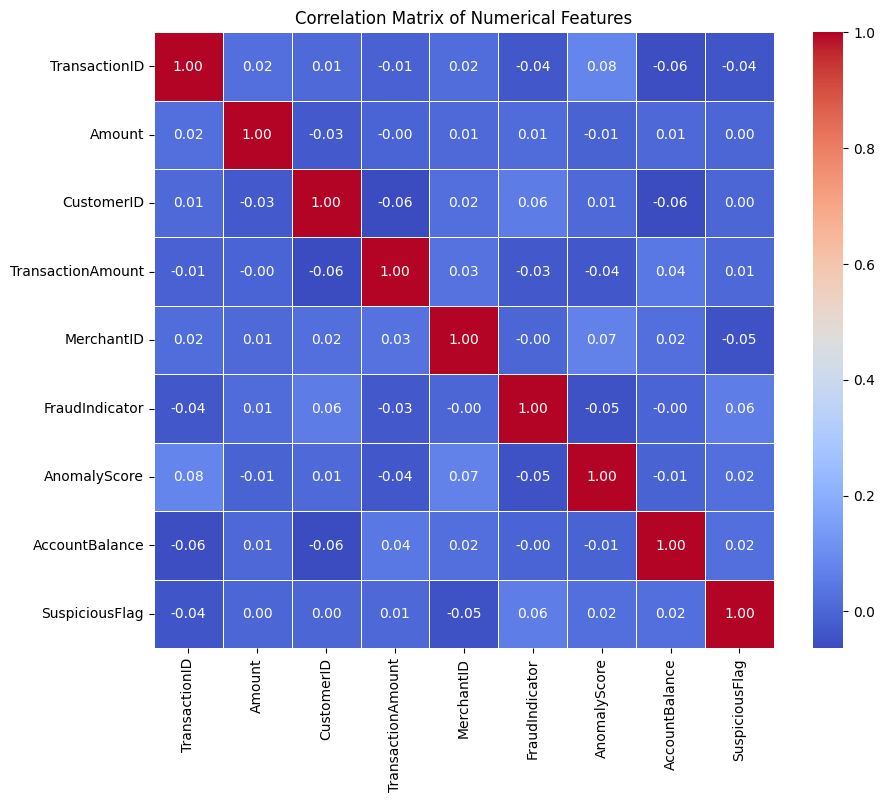

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_data = merged_transactions.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Showcase the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

correlation_matrix = transactions[numerical_data.columns].corr()

# Variance Inflation Factor (VIF) Calculation
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

vif_results = calculate_vif(merged_transactions, numerical_data.columns)

print("Variance Inflation Factor (VIF):\n", vif_results)

Variance Inflation Factor (VIF):
              feature        VIF
0      TransactionID   3.975375
1             Amount   5.653082
2         CustomerID  21.660655
3  TransactionAmount   5.417960
4         MerchantID  33.047899
5     FraudIndicator   1.058978
6       AnomalyScore   3.948305
7     AccountBalance   5.845039
8     SuspiciousFlag   1.032218


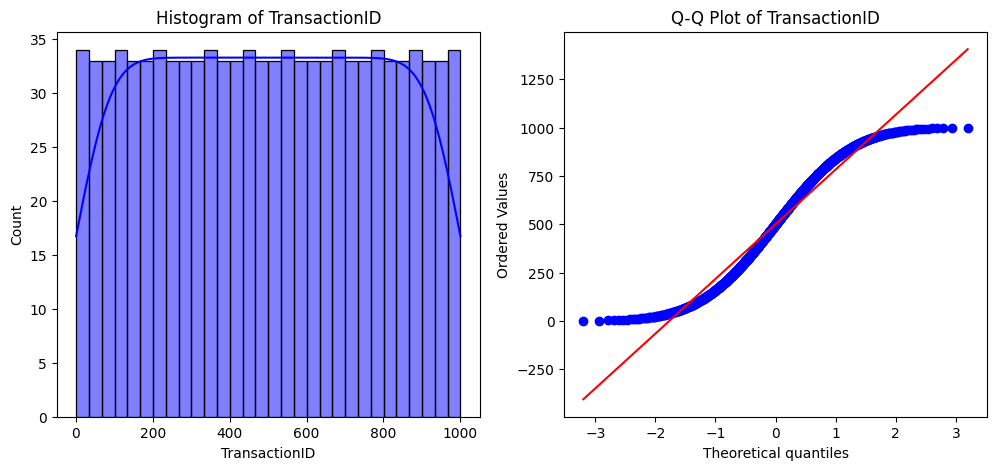

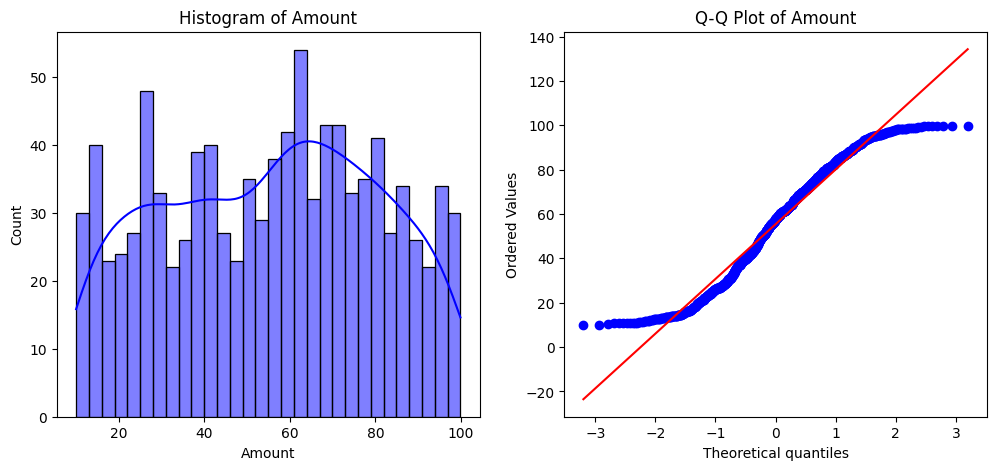

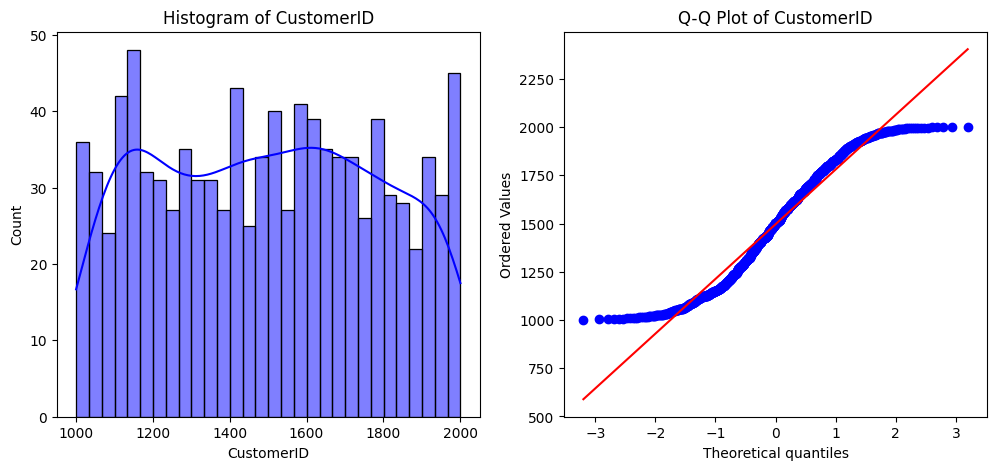

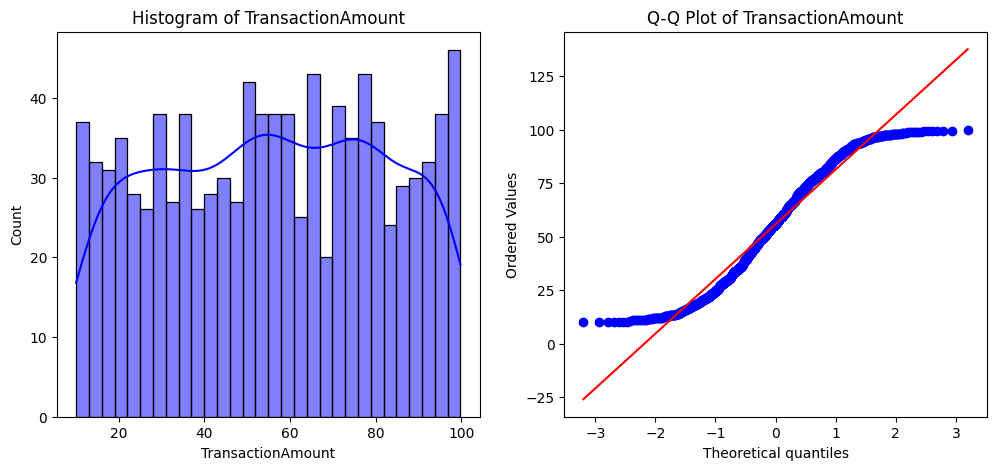

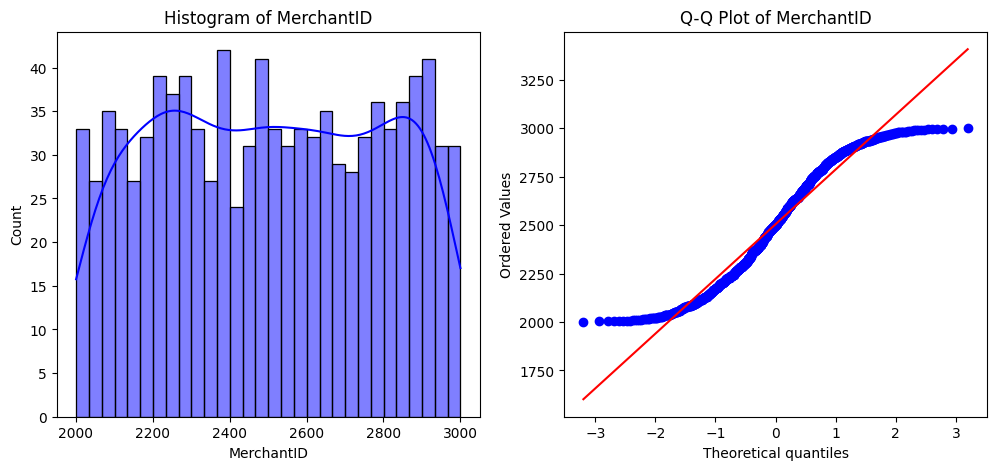

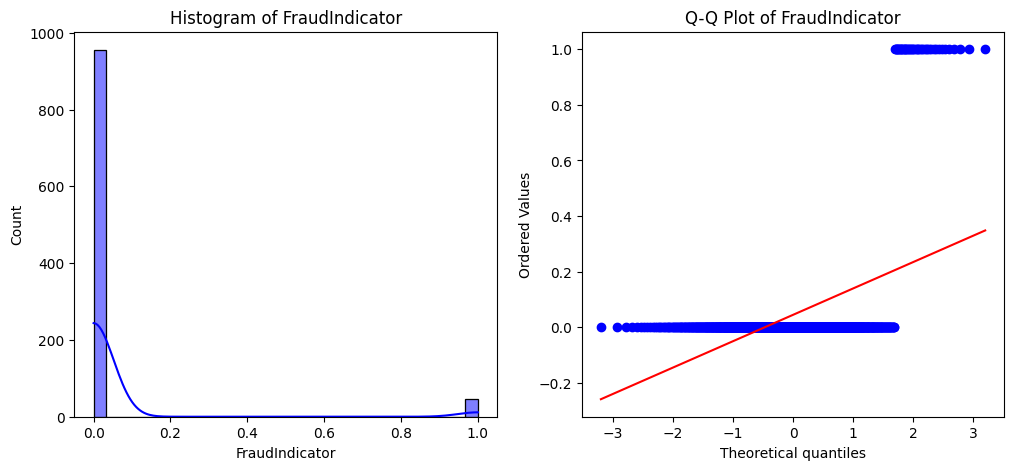

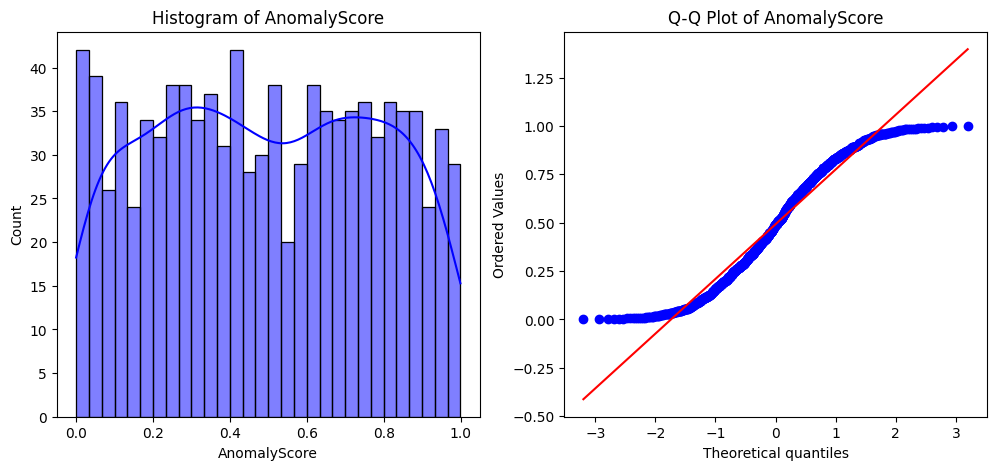

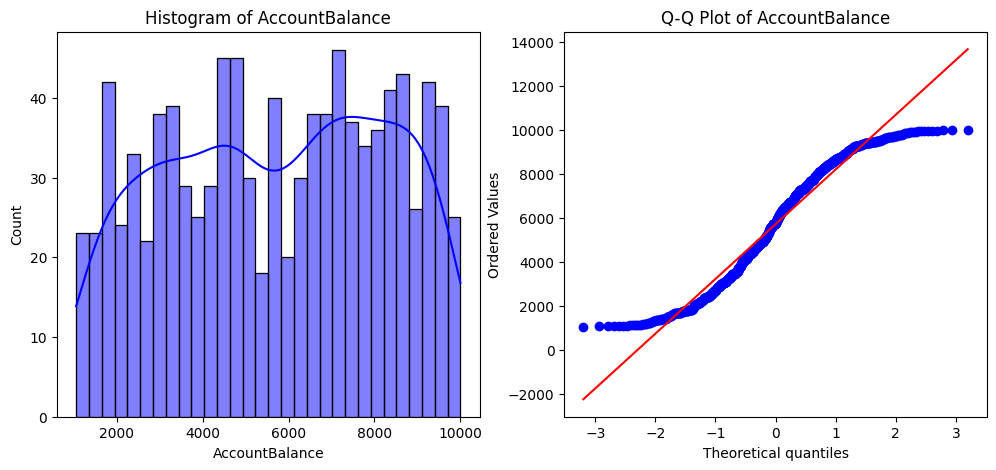

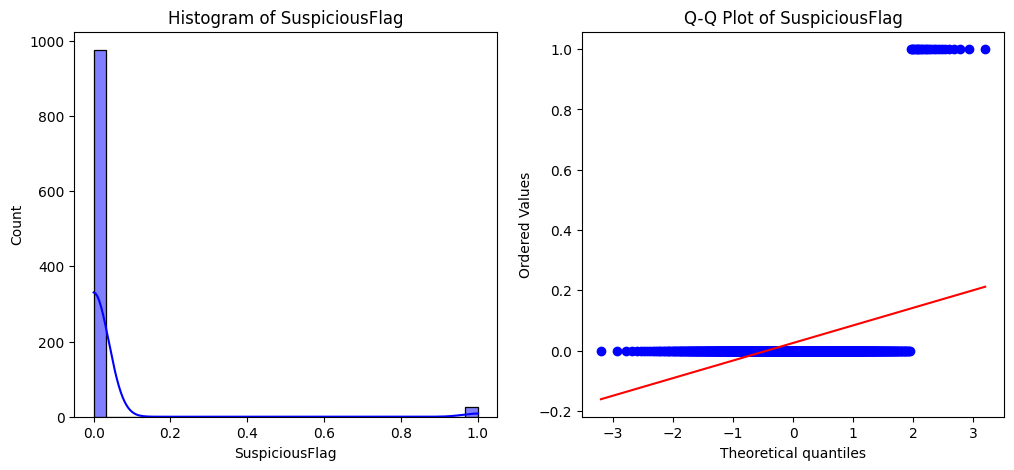

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Select numerical columns
numerical_data = merged_transactions.select_dtypes(include=['float64', 'int64'])

# Plot histograms and Q-Q plots for each numerical column
for col in numerical_data.columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical_data[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(numerical_data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    plt.show()


In [46]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for each numerical column
for col in numerical_data.columns:
    stat, p_value = shapiro(numerical_data[col])
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"  Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    
    # Interpret the p-value
    if p_value > 0.05:
        print(f"  {col} likely follows a normal distribution (p > 0.05)\n")
    else:
        print(f"  {col} does not follow a normal distribution (p <= 0.05)\n")


Shapiro-Wilk Test for TransactionID:
  Test Statistic = 0.9548, p-value = 0.0000
  TransactionID does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk Test for Amount:
  Test Statistic = 0.9628, p-value = 0.0000
  Amount does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk Test for CustomerID:
  Test Statistic = 0.9559, p-value = 0.0000
  CustomerID does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk Test for TransactionAmount:
  Test Statistic = 0.9560, p-value = 0.0000
  TransactionAmount does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk Test for MerchantID:
  Test Statistic = 0.9535, p-value = 0.0000
  MerchantID does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk Test for FraudIndicator:
  Test Statistic = 0.2090, p-value = 0.0000
  FraudIndicator does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk Test for AnomalyScore:
  Test Statistic = 0.9552, p-value = 0.0000
  AnomalyScore does not follow a normal distribu

In [50]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# One-hot encode 'Category' column
merged_transactions = pd.get_dummies(merged_transactions, columns=['Category'], drop_first=True)

# Label encode any remaining categorical columns ("Category", etc.)
categorical_columns = merged_transactions.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    if col != 'FraudIndicator':  # Don't encode the target variable
        merged_transactions[col] = label_encoder.fit_transform(merged_transactions[col])

# Separate the features (X) and the target (y)
X = merged_transactions.drop(columns=['FraudIndicator'])
y = merged_transactions['FraudIndicator']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:")
print(y_resampled.value_counts())

resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
resampled_data.to_csv('CreangaStefanAssignment2ResampledSMOTE.csv', index=False)


Resampled class distribution:
FraudIndicator
0    955
1    955
Name: count, dtype: int64


In [62]:
import pandas as pd

resampled_data = pd.read_csv('CreangaStefanAssignment2ResampledSMOTE.csv')
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
print(resampled_data.columns)


Index(['TransactionID', 'Amount', 'CustomerID', 'TransactionAmount',
       'Timestamp', 'MerchantID', 'AnomalyScore', 'AccountBalance',
       'LastLogin', 'SuspiciousFlag', 'Category_Online', 'Category_Other',
       'Category_Retail', 'Category_Travel', 'FraudIndicator'],
      dtype='object')


In [71]:
# List of columns to keep
columns_to_keep = ['TransactionID', 'SuspiciousFlag', 'FraudIndicator', 'AnomalyScore']
resampled_data = resampled_data[columns_to_keep]
print(resampled_data.head())

resampled_data.to_csv('FilteredCreangaStefanAssignment2ResampledSMOTE', index=False)



   TransactionID  SuspiciousFlag  FraudIndicator  AnomalyScore
0              1               0               0      0.686699
1              2               0               0      0.081749
2              3               0               0      0.023857
3              4               0               0      0.876994
4              5               0               0      0.034059


In [72]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(resampled_data)


      TransactionID  SuspiciousFlag  FraudIndicator  AnomalyScore
0                 1               0               0      0.686699
1                 2               0               0      0.081749
2                 3               0               0      0.023857
3                 4               0               0      0.876994
4                 5               0               0      0.034059
5                 6               0               0      0.121173
6                 7               0               0      0.109892
7                 8               0               0      0.780534
8                 9               0               1      0.010471
9                10               0               0      0.029376
10               11               0               0      0.083455
11               12               0               0      0.451735
12               13               0               0      0.444803
13               14               0               0      0.997340
14        

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Separate features (X) and target (y)
X = resampled_data.drop(columns=['FraudIndicator'])
y = resampled_data['FraudIndicator']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logreg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)

# Train the models
logreg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Models are now trained and can be used for prediction later
print("Models have been trained successfully.")


Models have been trained successfully.


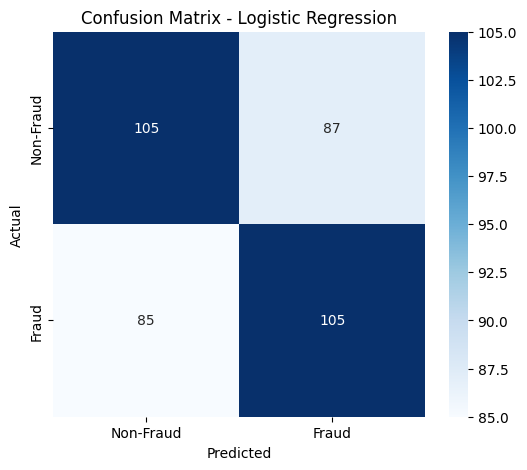

Performance metrics for Logistic Regression:
Accuracy: 0.5497
Precision: 0.5469
Recall: 0.5526
F1 Score: 0.5497
ROC AUC: 0.5739



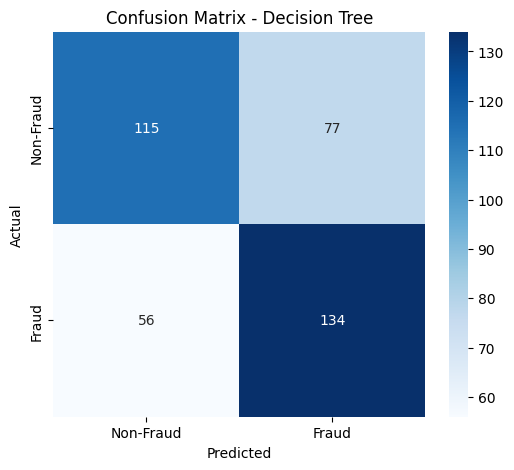

Performance metrics for Decision Tree:
Accuracy: 0.6518
Precision: 0.6351
Recall: 0.7053
F1 Score: 0.6683
ROC AUC: 0.6521



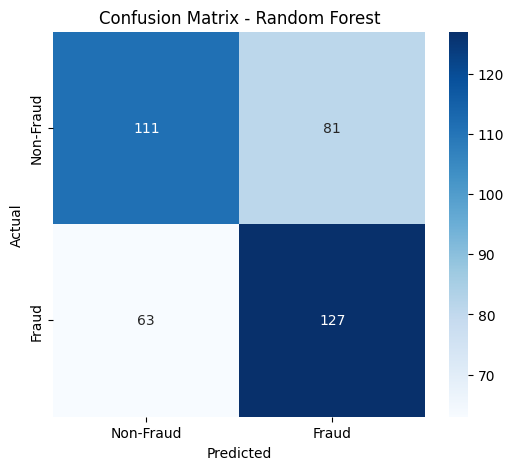

Performance metrics for Random Forest:
Accuracy: 0.6230
Precision: 0.6106
Recall: 0.6684
F1 Score: 0.6382
ROC AUC: 0.7029



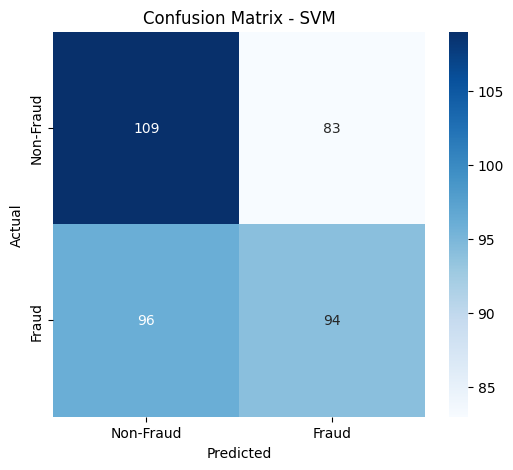

Performance metrics for SVM:
Accuracy: 0.5314
Precision: 0.5311
Recall: 0.4947
F1 Score: 0.5123
ROC AUC: 0.5458



In [74]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and display performance metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Display metrics
    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n" + "="*50)

# Evaluate each model
models = [logreg, decision_tree, random_forest, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

for model, model_name in zip(models, model_names):
    evaluate_model(model, X_test, y_test, model_name)


In [75]:
from sklearn.model_selection import GridSearchCV

# GridSearch Technique

# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Decision Tree hyperparameters
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Logistic Regression
logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)
print(f"Best Logistic Regression Parameters: {logreg_grid_search.best_params_}")
print(f"Best Logistic Regression Score: {logreg_grid_search.best_score_}")

# Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=decision_tree, param_grid=dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")
print(f"Best Decision Tree Score: {dt_grid_search.best_score_}")

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=random_forest, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest Score: {rf_grid_search.best_score_}")


Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.5556584163720133
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Decision Tree Score: 0.6452716168434587
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Score: 0.6767234544090861


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models with the best parameters
logreg_optimal = LogisticRegression(C=0.1, solver='lbfgs', random_state=42)
decision_tree_optimal = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, random_state=42)
random_forest_optimal = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42)

# Train the models
logreg_optimal.fit(X_train, y_train)
decision_tree_optimal.fit(X_train, y_train)
random_forest_optimal.fit(X_train, y_train)

# Evaluate the models using the test set
logreg_score = logreg_optimal.score(X_test, y_test)
decision_tree_score = decision_tree_optimal.score(X_test, y_test)
random_forest_score = random_forest_optimal.score(X_test, y_test)

print(f"Logistic Regression Test Score: {logreg_score}")
print(f"Decision Tree Test Score: {decision_tree_score}")
print(f"Random Forest Test Score: {random_forest_score}")


Logistic Regression Test Score: 0.5523560209424084
Decision Tree Test Score: 0.6335078534031413
Random Forest Test Score: 0.6230366492146597


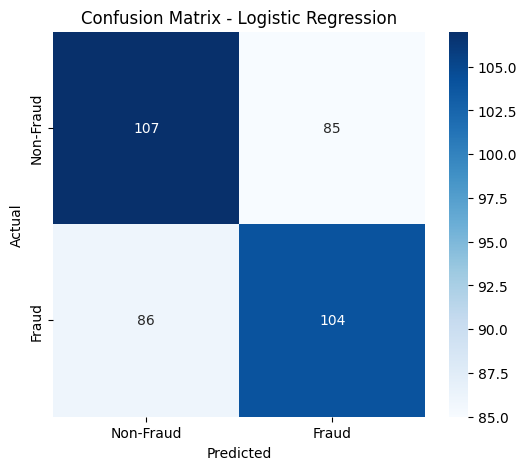

Performance metrics for Logistic Regression:
Accuracy: 0.5524
Precision: 0.5503
Recall: 0.5474
F1 Score: 0.5488
ROC AUC: 0.5706



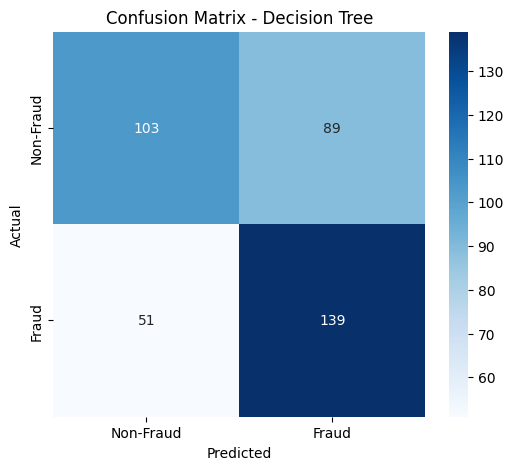

Performance metrics for Decision Tree:
Accuracy: 0.6335
Precision: 0.6096
Recall: 0.7316
F1 Score: 0.6651
ROC AUC: 0.6720



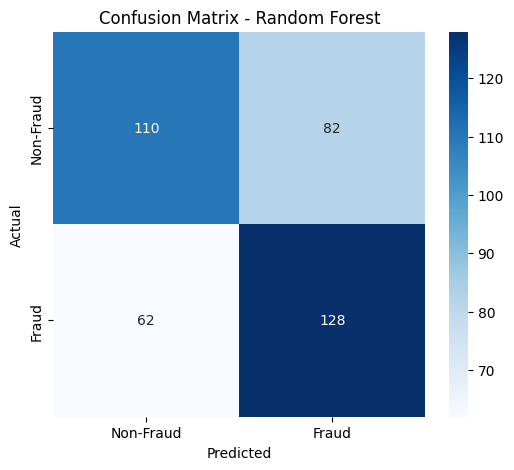

Performance metrics for Random Forest:
Accuracy: 0.6230
Precision: 0.6095
Recall: 0.6737
F1 Score: 0.6400
ROC AUC: 0.7011



In [81]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and display performance metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Display metrics
    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n" + "="*50)

# Evaluate each model
models = [logreg_optimal, decision_tree_optimal, random_forest_optimal]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, model_name in zip(models, model_names):
    evaluate_model(model, X_test, y_test, model_name)
